# Laboration 2

  - read the data and store the appropriate data structure
  - plotting all the points with different colors together
  - read test points
  - calculate distance between test point and other points
  - classification of test points

## 1) Reading, cleaning and plotting the data

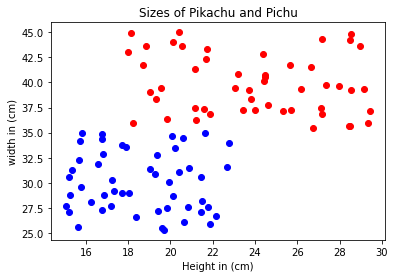

In [1]:
import matplotlib.pyplot as plt
import random as rnd

with open ("files/pikachu.txt", "r") as f1:
    pikachu_list = [pikachu.strip("\n") for pikachu in f1.readlines()] #Remove spaces
    pikachu_list.remove ("(width (cm), height (cm))") #remove the title
    pikachu_list = [pikachu.replace("(","").replace(")","") for pikachu in pikachu_list] #replace parenthesis with ""
    pikachu_list = [pikachu.split(",") for pikachu in pikachu_list] #the string should be splitted into lists
    pikachu_list = [[float(pikachu[0]), float(pikachu[1])] for pikachu in pikachu_list] #change elements to floats 
    
    

with open ("files/pichu.txt", "r") as f2:
    pichu_list = [pichu.strip("\n") for pichu in f2.readlines()] 
    pichu_list.remove ("(width (cm), height (cm))")
    pichu_list = [pichu.replace("(","").replace(")","") for pichu in pichu_list]
    pichu_list = [pichu.split(",") for pichu in pichu_list] 
    pichu_list = [[float(pichu[0]), float(pichu[1])] for pichu in pichu_list] 
    
    

#giving the width and the height by mentioning th first and the second elements
pikachu_width = [pikachu[0] for pikachu in pikachu_list]
pikachu_height = [pikachu[1] for pikachu in pikachu_list]
pichu_width = [pichu[0] for pichu in pichu_list]
pichu_height = [pichu[1] for pichu in pichu_list]

# the type of plot is based on the link: https://dzone.com/articles/types-of-matplotlib-in-python
plt.scatter(pikachu_width,pikachu_height, label="pikachu",color="red")
plt.scatter(pichu_width,pichu_height,label="pichu",color="blue")
plt.title("Sizes of Pikachu and Pichu")
plt.xlabel("Height in (cm)")
plt.ylabel("width in (cm)")
plt.show()

# 2) Working on test points

In [23]:
with open ("files/test_points.txt") as f3:
    points_list = f3.readlines()
    points_list = points_list[0].split(")")
    points_list = [point.replace("(","") for point in points_list]
    points_list = [point.replace (", (","") for point in points_list]
    points_list = [point.split(",") for point in points_list] 
    points_list = [[float(point[0]), float(point[1])] for point in points_list]
    print (points_list)

ValueError: could not convert string to float: ''